In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv('data/Patient_Diagnosis_Data.csv')
df

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,20190713,0,자영업,60.3,20190716,13.66,0,10,0,1.0
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,20190715,0,운동선수,71.7,20190716,13.73,0,10,0,1.0
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,20190729,0,특수전문직,77.1,20190801,15.34,0,7,0,1.0
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,20190731,0,주부,74.2,20190803,15.38,0,7,0,2.0
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,20190903,0,특수전문직,80.7,20190907,13.08,0,7,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,0,...,20170407,1,무직,64.0,20170408,13.60,0,7,0,12.0
1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,0,...,20170426,0,사무직,59.0,20170429,13.00,0,7,0,6.0
1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,1,...,20170410,0,무직,70.0,20170412,14.40,0,7,0,1.0
1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,0,...,20170408,0,사무직,77.0,20170411,15.00,0,7,0,24.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   Large Lymphocyte        1894 non-null   float64
 2   Location of herniation  1894 non-null   int64  
 3   ODI                     462 non-null    float64
 4   가족력                     1843 non-null   float64
 5   간질성폐질환                  1894 non-null   int64  
 6   고혈압여부                   1894 non-null   int64  
 7   과거수술횟수                  1894 non-null   int64  
 8   당뇨여부                    1894 non-null   int64  
 9   말초동맥질환여부                1894 non-null   int64  
 10  빈혈여부                    1894 non-null   int64  
 11  성별                      1894 non-null   int64  
 12  스테로이드치료                 1894 non-null   int64  
 13  신부전여부                   1894 non-null   int64  
 14  신장                      1894 non-null   

In [13]:
df.isnull().sum()

환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
신장                           0
심혈관질환                        0
암발병여부                        0
연령                           0
우울증여부                        0
입원기간                         0
입원일자                         0
종양진행여부                       0
직업                         415
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
혈전합병증여부                      0
환자통증정도                       0
흡연여부                         0
통증기간(월)                      4
dtype: int64

In [14]:
df.describe()

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,입원기간,입원일자,종양진행여부,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)
count,1894.000000,1894.000000,462.000000,1843.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,...,1894.000000,1.894000e+03,1894.000000,1894.000000,1.894000e+03,1893.00000,1894.000000,1894.000000,1894.000000,1890.000000
mean,39.270750,2.295671,31.142857,0.049919,0.020063,0.130940,0.302534,0.062830,0.004224,0.024287,...,1.736536,2.016015e+07,0.003168,68.111140,2.016000e+07,14.58113,0.002112,6.884372,0.217001,5.879841
std,13.675874,0.996143,10.131304,0.217836,0.140254,0.337424,0.638461,0.242721,0.064871,0.153980,...,2.344085,3.677496e+04,0.056210,11.234318,3.689652e+04,1.55126,0.045919,2.075907,0.412312,17.241970
min,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.009012e+07,0.000000,35.000000,2.009012e+07,7.00000,0.000000,1.000000,0.000000,0.000000
25%,30.700000,1.000000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.012111e+07,0.000000,59.700000,2.012101e+07,13.50000,0.000000,7.000000,0.000000,1.000000
50%,40.200000,2.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.018123e+07,0.000000,68.000000,2.019010e+07,14.65000,0.000000,7.000000,0.000000,2.000000
75%,48.600000,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.019062e+07,0.000000,75.000000,2.019062e+07,15.64000,0.000000,8.000000,0.000000,4.000000
max,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,51.000000,2.020080e+07,1.000000,136.100000,2.020081e+07,19.38000,1.000000,10.000000,1.000000,360.000000


In [4]:
df['Large Lymphocyte']

0       22.8
1       44.9
2       53.0
3       54.7
4       53.8
        ... 
1889    44.0
1890    30.8
1891    36.7
1892    32.5
1893    49.5
Name: Large Lymphocyte, Length: 1894, dtype: float64

In [5]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)'],
      dtype='object')

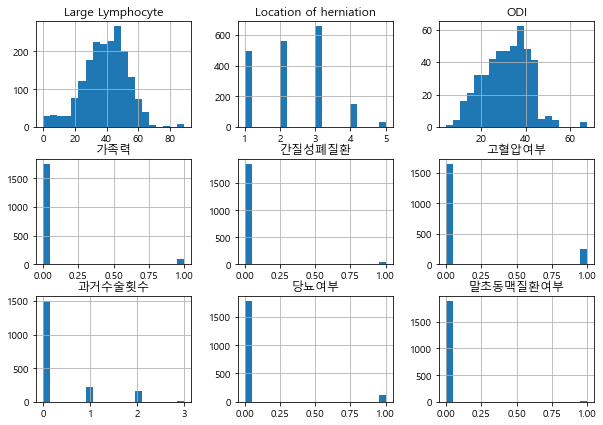

In [7]:
df[['Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부']].hist(figsize = (10, 7), bins = 20);

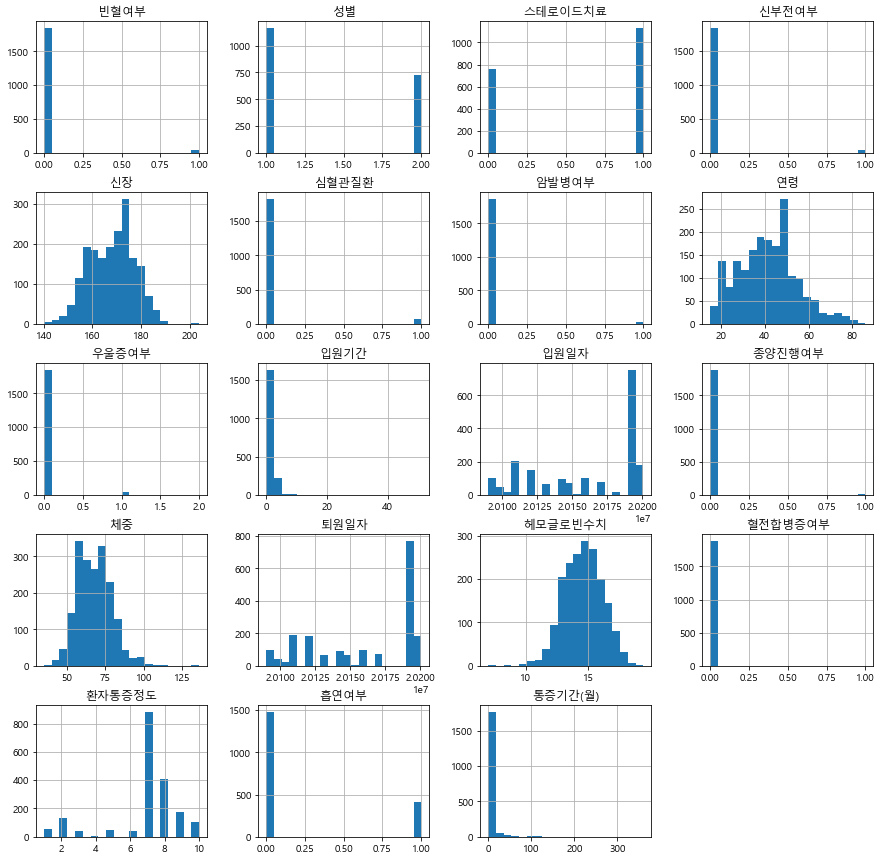

In [10]:
df[['빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)']].hist(figsize = (15, 15), bins = 20);

In [15]:
df['Location of herniation']

0       3
1       4
2       3
3       4
4       4
       ..
1889    1
1890    2
1891    3
1892    2
1893    2
Name: Location of herniation, Length: 1894, dtype: int64

In [16]:
df['성별'].value_counts()

1    1168
2     726
Name: 성별, dtype: int64

<AxesSubplot:>

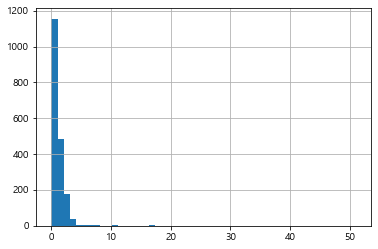

In [18]:
df['입원기간'].hist(bins = 50)

In [24]:
df['통증기간(월)'].value_counts()

1.00      805
2.00      363
3.00      167
12.00      93
6.00       91
4.00       53
5.00       51
24.00      41
10.00      25
7.00       23
36.00      21
8.00       20
9.00       20
1.50       19
60.00      10
120.00      9
18.00       8
0.50        7
48.00       7
0.25        6
0.20        5
96.00       5
14.00       4
16.00       2
0.30        2
30.00       2
240.00      2
13.00       2
15.00       2
17.00       2
0.10        2
0.80        2
22.00       2
21.00       2
0.75        2
84.00       2
108.00      1
63.00       1
32.00       1
4.50        1
180.00      1
46.00       1
0.00        1
2.50        1
3.50        1
11.00       1
360.00      1
Name: 통증기간(월), dtype: int64

In [20]:
df.pivot_table(index = '성별', values = '체중')

,체중
성별,
1,73.763356
2,59.017769


In [25]:
df['직업'].value_counts()

사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
농업        40
의료직       40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

In [26]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)'],
      dtype='object')

# 1. ODI - 환자통증정도 두 값을 하나로 봐도 무관할까??

<AxesSubplot:xlabel='환자통증정도', ylabel='ODI'>

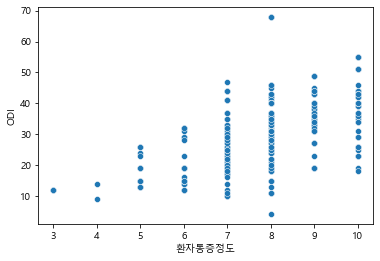

In [29]:
sns.scatterplot(data = df, x = '환자통증정도', y = 'ODI')

In [32]:
df.corr()

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,입원기간,입원일자,종양진행여부,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)
Large Lymphocyte,1.000000,0.008953,-0.136610,0.000763,-0.011371,-0.002890,0.046275,0.031841,-0.024810,-0.000716,...,-0.034671,0.018682,-0.002972,-0.007554,0.022611,-0.015435,-0.021689,-0.000947,-0.015137,0.011031
Location of herniation,0.008953,1.000000,0.036780,0.027792,0.006672,0.040350,0.071914,0.045478,-0.002987,0.035815,...,-0.012094,-0.001601,0.002132,-0.006030,-0.006341,-0.010302,0.020988,0.150401,0.000617,-0.025674
ODI,-0.136610,0.036780,1.000000,0.025289,0.063709,0.007823,-0.022305,0.054093,NaN,0.006213,...,-0.041540,-0.022929,NaN,-0.039305,-0.020577,-0.013074,NaN,0.610234,0.024402,-0.043362
가족력,0.000763,0.027792,0.025289,1.000000,-0.015045,0.020730,0.035082,0.042503,0.022764,-0.020703,...,-0.025661,-0.051257,-0.013100,0.006715,-0.052166,0.028177,0.042848,-0.012938,0.024049,0.033691
간질성폐질환,-0.011371,0.006672,0.063709,-0.015045,1.000000,-0.033216,0.038367,0.025022,-0.009319,-0.022575,...,-0.016049,-0.014400,-0.008066,-0.008624,-0.023937,-0.035344,-0.006583,-0.082746,-0.002248,-0.027704
고혈압여부,-0.002890,0.040350,0.007823,0.020730,-0.033216,1.000000,0.100467,0.176850,0.022987,0.040433,...,0.040967,0.049021,0.061675,0.045421,0.041019,-0.044854,-0.017857,0.046514,-0.041070,0.005458
과거수술횟수,0.046275,0.071914,-0.022305,0.035082,0.038367,0.100467,1.000000,0.102260,0.007394,-0.015672,...,0.052581,-0.055899,-0.012000,0.047395,-0.066973,-0.012510,0.014232,0.006479,0.023395,-0.009783
당뇨여부,0.031841,0.045478,0.054093,0.042503,0.025022,0.176850,0.102260,1.000000,0.016686,0.058090,...,0.021682,0.026993,-0.014597,0.013517,0.020333,-0.059945,0.035485,0.041685,0.011491,-0.008650
말초동맥질환여부,-0.024810,-0.002987,NaN,0.022764,-0.009319,0.022987,0.007394,0.016686,1.000000,-0.010275,...,0.170598,0.016110,-0.003672,-0.042469,0.016380,-0.023939,-0.002996,-0.066981,0.024964,0.012274
빈혈여부,-0.000716,0.035815,0.006213,-0.020703,-0.022575,0.040433,-0.015672,0.058090,-0.010275,1.000000,...,-0.008607,-0.007996,-0.008894,-0.030267,-0.005471,-0.194078,-0.007258,-0.012694,-0.066416,0.019327


# 2. ODI와의 관계

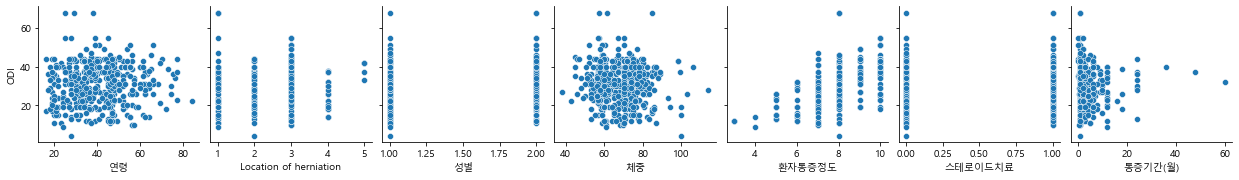

In [28]:
sns.pairplot(x_vars= ['연령', 'Location of herniation', '성별', '체중', '환자통증정도', '스테로이드치료', '통증기간(월)' ], y_vars= ['ODI'], data = df)

<AxesSubplot:xlabel='환자통증정도', ylabel='Location of herniation'>

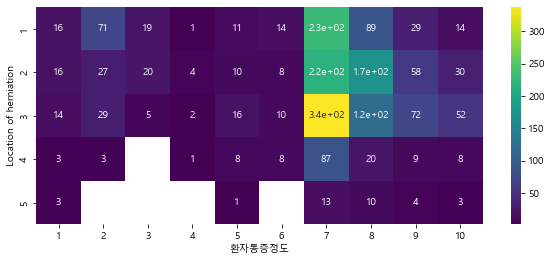

In [34]:
df_pivot = df.pivot_table(index = 'Location of herniation', columns = '환자통증정도', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

In [46]:
def get_agerange(age):
    return str(age)[0] + '0대'
    
df['연령대'] = df['연령'].apply(get_agerange)

<AxesSubplot:xlabel='환자통증정도', ylabel='연령대'>

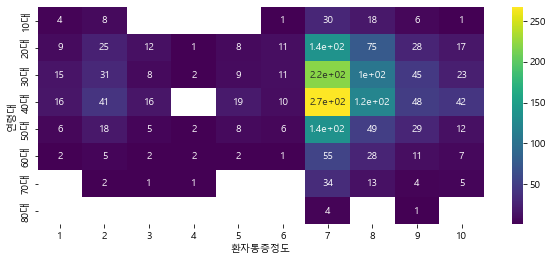

In [48]:
df_pivot = df.pivot_table(index = '연령대', columns = '환자통증정도', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='환자통증정도', ylabel='직업'>

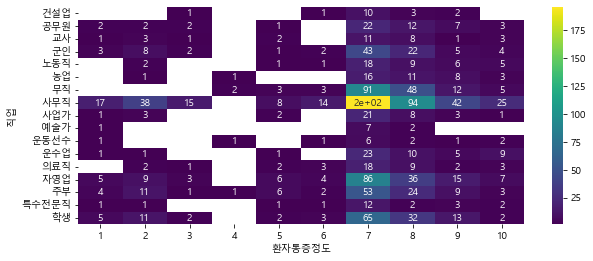

In [35]:
df_pivot = df.pivot_table(index = '직업', columns = '환자통증정도', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='Location of herniation', ylabel='직업'>

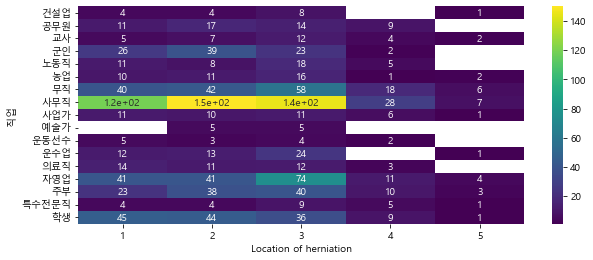

In [39]:
df_pivot = df.pivot_table(index = '직업', columns = 'Location of herniation', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='Location of herniation', ylabel='성별'>

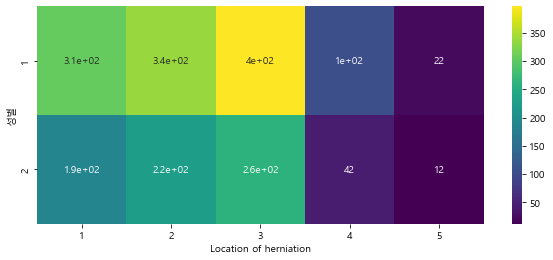

In [40]:
df_pivot = df.pivot_table(index = '성별', columns = 'Location of herniation', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='Location of herniation', ylabel='연령대'>

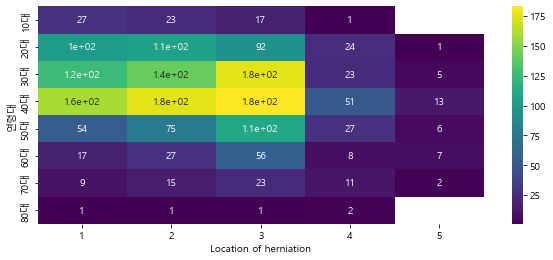

In [47]:
df_pivot = df.pivot_table(index = '연령대', columns = 'Location of herniation', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='Location of herniation', ylabel='count'>

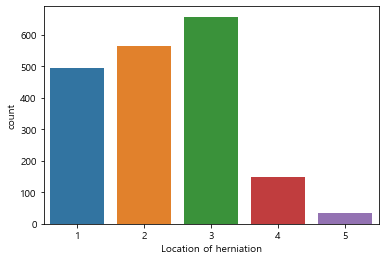

In [122]:
sns.countplot(data = df, x = 'Location of herniation')

<AxesSubplot:xlabel='직업', ylabel='count'>

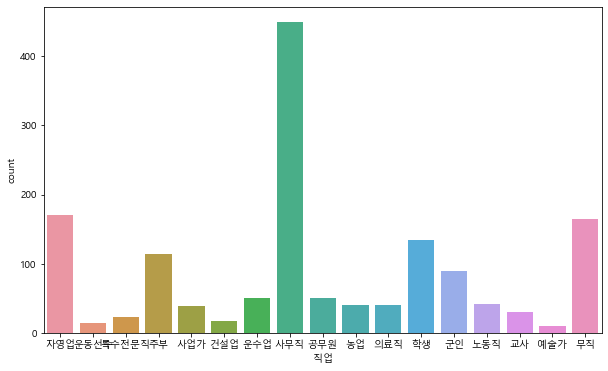

In [58]:
plt.figure(figsize= (10, 6))
sns.countplot(data = df, x = '직업')

<AxesSubplot:xlabel='연령대', ylabel='count'>

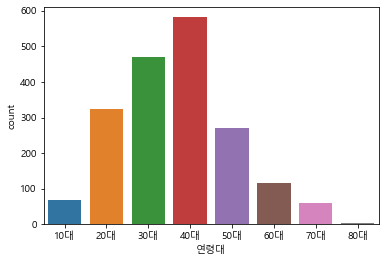

In [50]:
sns.countplot(data = df.sort_values(by = '연령대'), x = '연령대')

<AxesSubplot:xlabel='직업', ylabel='count'>

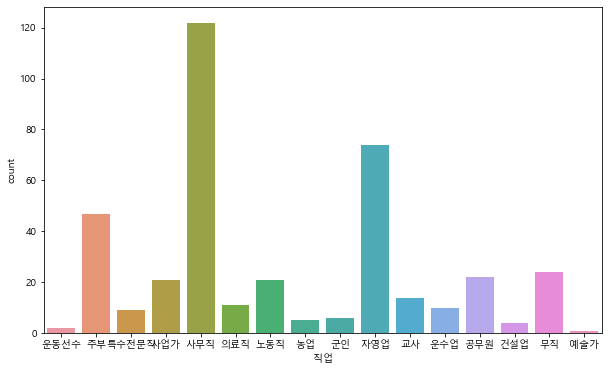

In [59]:
plt.figure(figsize= (10, 6))
sns.countplot(data = df.loc[(df['연령대'] == '40대')], x = '직업')

<AxesSubplot:xlabel='직업', ylabel='count'>

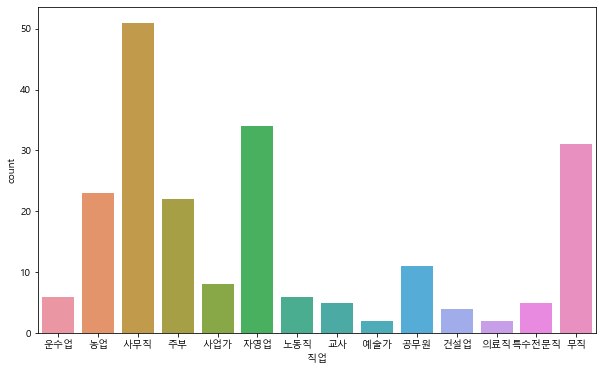

In [121]:
plt.figure(figsize= (10, 6))
sns.countplot(data = df.loc[(df['연령대'] == '50대')], x = '직업')

<AxesSubplot:xlabel='직업', ylabel='count'>

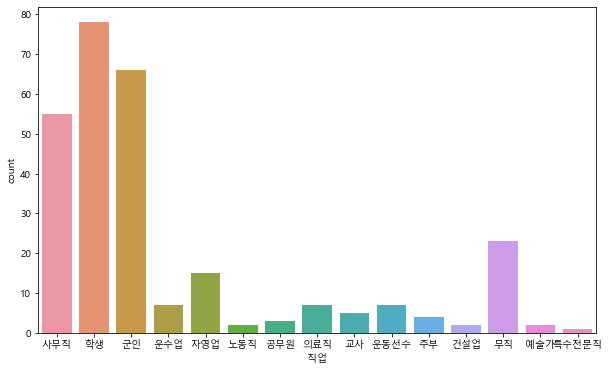

In [119]:
plt.figure(figsize= (10, 6))
sns.countplot(data = df.loc[(df['연령대'] == '20대')], x = '직업')

<AxesSubplot:xlabel='직업', ylabel='count'>

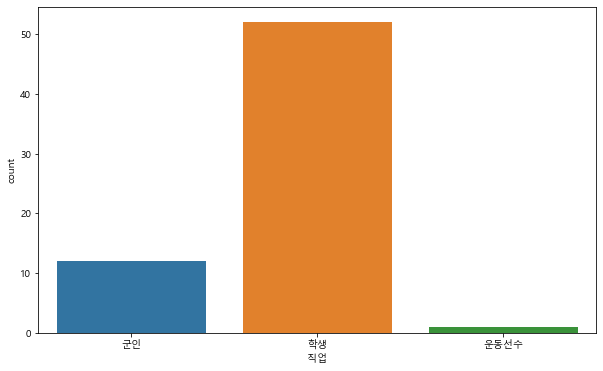

In [120]:
plt.figure(figsize= (10, 6))
sns.countplot(data = df.loc[(df['연령대'] == '10대')], x = '직업')

<AxesSubplot:xlabel='성별', ylabel='count'>

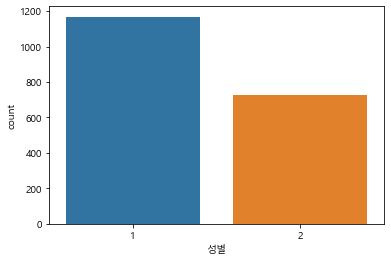

In [62]:
sns.countplot(data = df, x = '성별')

<AxesSubplot:xlabel='통증기간(월)', ylabel='count'>

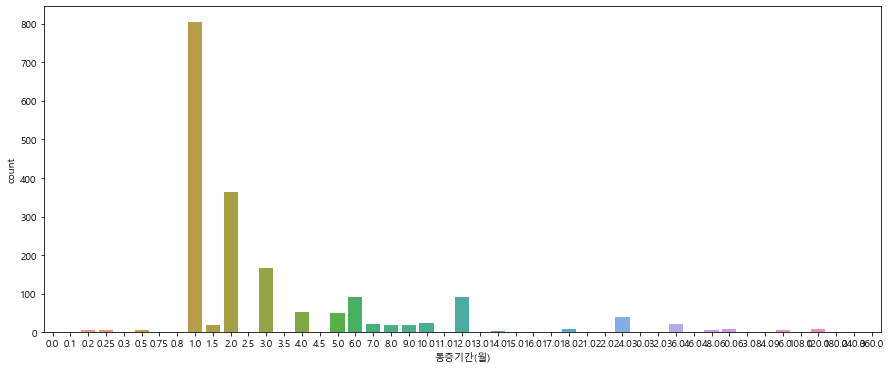

In [70]:
plt.figure(figsize= (15, 6))
sns.countplot(data = df.sort_values(by = '통증기간(월)'), x = '통증기간(월)')

<AxesSubplot:xlabel='환자통증정도', ylabel='count'>

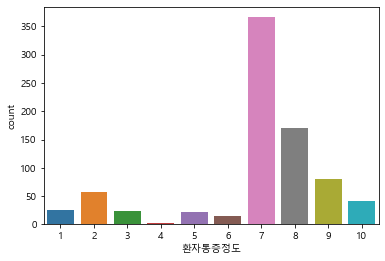

In [72]:
sns.countplot(data = df.loc[df['통증기간(월)'] == 1], x = '환자통증정도')

In [75]:
df_sur = pd.read_csv('data/Patient_Surgery_Data.csv')
df_sur

,환자ID,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,헤모글로빈수치,환자통증정도,통증기간(월),혈액형
0,1PT,TELD,68.0,0,20190715,163,66,20190713,0,60.3,20190716,13.66,10,1.0,RH+A
1,2PT,TELD,31.0,0,20190716,171,47,20190715,0,71.7,20190716,13.73,10,1.0,RH+A
2,3PT,TELD,78.0,0,20190731,178,39,20190729,0,77.1,20190801,15.34,7,1.0,RH+B
3,4PT,TELD,73.0,0,20190802,174,40,20190731,0,74.2,20190803,15.38,7,2.0,RH+O
4,5PT,TELD,29.0,0,20190906,183,42,20190903,0,80.7,20190907,13.08,7,1.0,RH+A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,NaN,80.0,0,20170407,157,59,20170407,0,64.0,20170408,13.60,7,12.0,RH+A
1890,1891PT,NaN,20.0,0,20170427,157,42,20170426,0,59.0,20170429,13.00,7,6.0,RH+B
1891,1892PT,IELD,50.0,0,20170411,167,61,20170410,0,70.0,20170412,14.40,7,1.0,RH+O
1892,1893PT,NaN,25.0,0,20170410,177,29,20170408,0,77.0,20170411,15.00,7,24.0,RH+A


In [77]:
sur = df_sur['수술실패여부']
sur

0       0
1       0
2       0
3       0
4       0
       ..
1889    0
1890    0
1891    0
1892    0
1893    0
Name: 수술실패여부, Length: 1894, dtype: int64

In [86]:
df = pd.merge(df, df_sur)
df

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,신장,연령,입원일자,재발여부,체중,퇴원일자,헤모글로빈수치,환자통증정도,통증기간(월),혈액형
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,163,66,20190713,0,60.3,20190716,13.66,10,1.0,RH+A
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,171,47,20190715,0,71.7,20190716,13.73,10,1.0,RH+A
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,178,39,20190729,0,77.1,20190801,15.34,7,1.0,RH+B
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,174,40,20190731,0,74.2,20190803,15.38,7,2.0,RH+O
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,183,42,20190903,0,80.7,20190907,13.08,7,1.0,RH+A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,0,...,157,59,20170407,0,64.0,20170408,13.60,7,12.0,RH+A
1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,0,...,157,42,20170426,0,59.0,20170429,13.00,7,6.0,RH+B
1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,1,...,167,61,20170410,0,70.0,20170412,14.40,7,1.0,RH+O
1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,0,...,177,29,20170408,0,77.0,20170411,15.00,7,24.0,RH+A


<AxesSubplot:xlabel='혈액형', ylabel='count'>

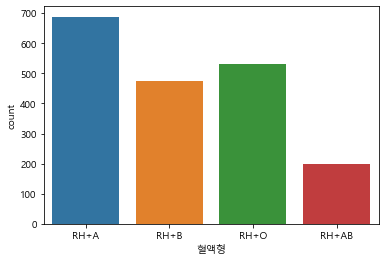

In [88]:
sns.countplot(data = df, x = '혈액형')

<AxesSubplot:title={'center':'ODI'}, xlabel='수술실패여부'>

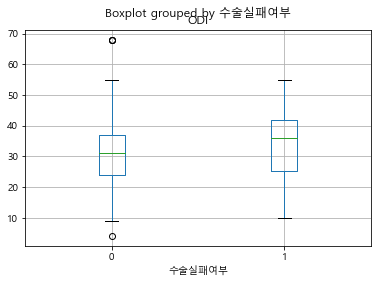

In [90]:
df.boxplot(column=['ODI'], by = '수술실패여부')

<AxesSubplot:title={'center':'신장'}, xlabel='수술실패여부'>

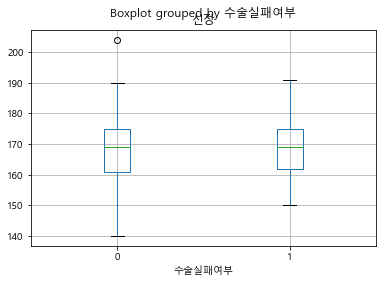

In [100]:
df.boxplot(column=['신장'], by = '수술실패여부')

<AxesSubplot:title={'center':'체중'}, xlabel='수술실패여부'>

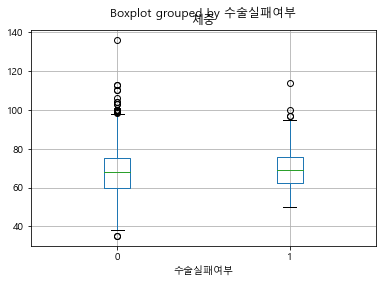

In [101]:
df.boxplot(column=['체중'], by = '수술실패여부')

<AxesSubplot:title={'center':'연령'}, xlabel='수술실패여부'>

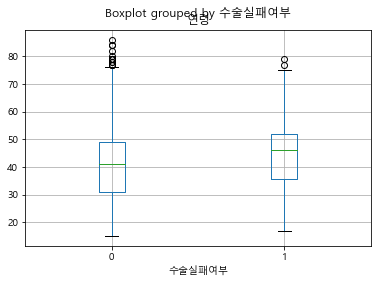

In [102]:
df.boxplot(column=['연령'], by = '수술실패여부')

<AxesSubplot:title={'center':'입원기간'}, xlabel='수술실패여부'>

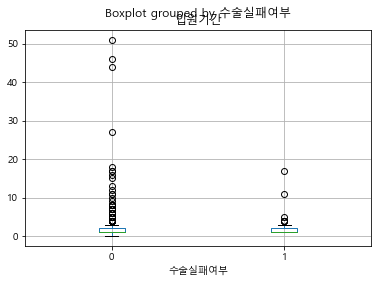

In [103]:
df.boxplot(column=['입원기간'], by = '수술실패여부')

<AxesSubplot:title={'center':'Large Lymphocyte'}, xlabel='수술실패여부'>

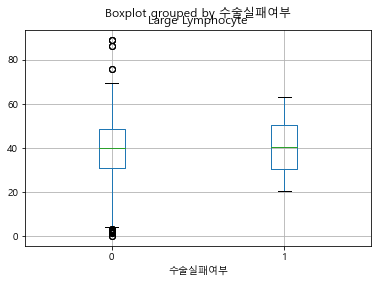

In [104]:
df.boxplot(column=['Large Lymphocyte'], by = '수술실패여부')

<AxesSubplot:xlabel='과거수술횟수', ylabel='수술실패여부'>

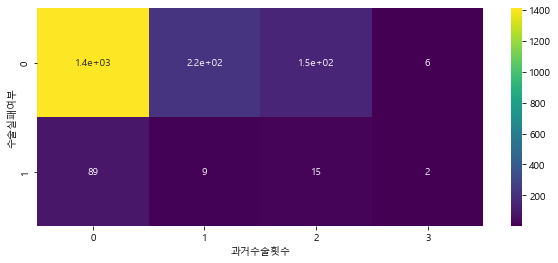

In [89]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '과거수술횟수', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='성별', ylabel='수술실패여부'>

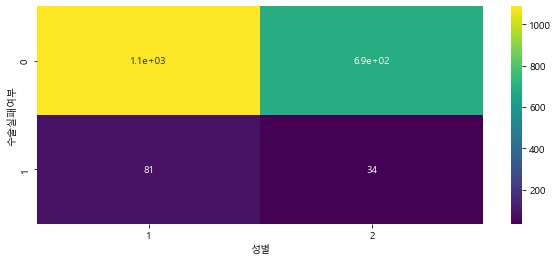

In [105]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '성별', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='가족력', ylabel='수술실패여부'>

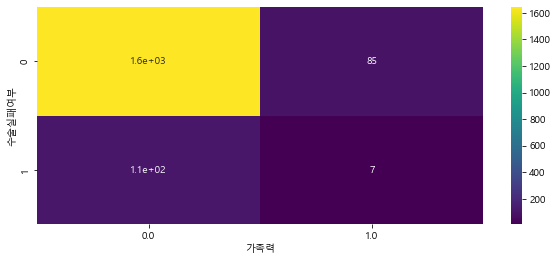

In [110]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '가족력', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='직업', ylabel='수술실패여부'>

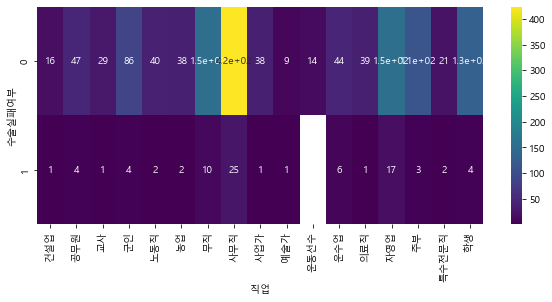

In [111]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '직업', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='환자통증정도', ylabel='수술실패여부'>

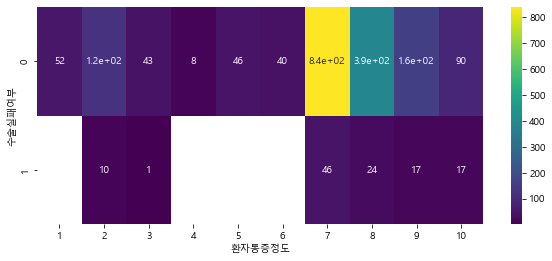

In [112]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '환자통증정도', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='연령대', ylabel='수술실패여부'>

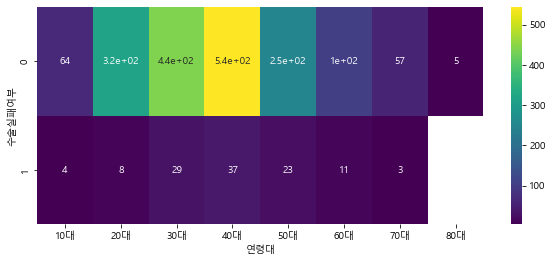

In [113]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '연령대', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='통증기간(월)', ylabel='수술실패여부'>

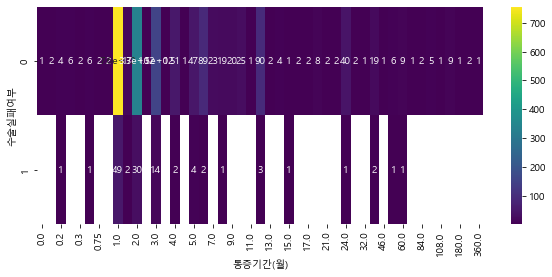

In [115]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '통증기간(월)', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='Location of herniation', ylabel='수술실패여부'>

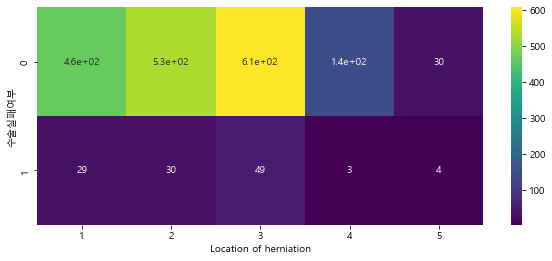

In [116]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = 'Location of herniation', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='당뇨여부', ylabel='수술실패여부'>

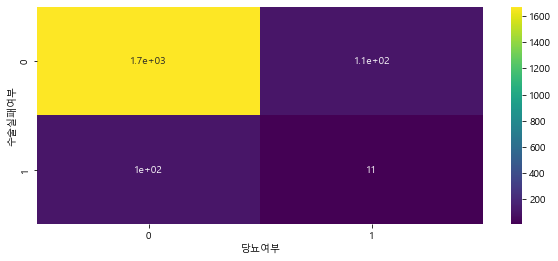

In [125]:
df_pivot = df.pivot_table(index = '수술실패여부', columns = '당뇨여부', values = '환자ID', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

# 추가 분석

In [138]:
df1 = pd.read_csv('data/df_all.csv')

In [139]:
df1.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도'],
      dtype='object')

In [140]:
df1 = df1[['전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '재발여부']]

In [141]:
df1

,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대,BMI,디스크높이차(mm),비만정도,재발여부
0,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,0,2048.50,4,Down,0,60대,22.695623,3.8,정상,0
1,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,0,1753.10,4,Up,0,40대,24.520365,7.3,과체중,0
2,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,0,1749.00,4,Down,0,30대,24.334049,6.2,과체중,0
3,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,0,1796.20,4,Down,0,40대,24.507861,3.3,과체중,0
4,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,0,2021.48,4,Up,0,40대,24.097465,9.0,과체중,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,0,2652.20,5,Middle,0,50대,25.964542,6.3,경도비만,0
1881,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,0,1795.80,4,Down,0,40대,23.936062,1.2,과체중,0
1882,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,1,2624.40,4,Down,0,60대,25.099502,8.0,경도비만,0
1883,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,0,1972.50,5,Down,0,20대,24.577867,4.0,과체중,0


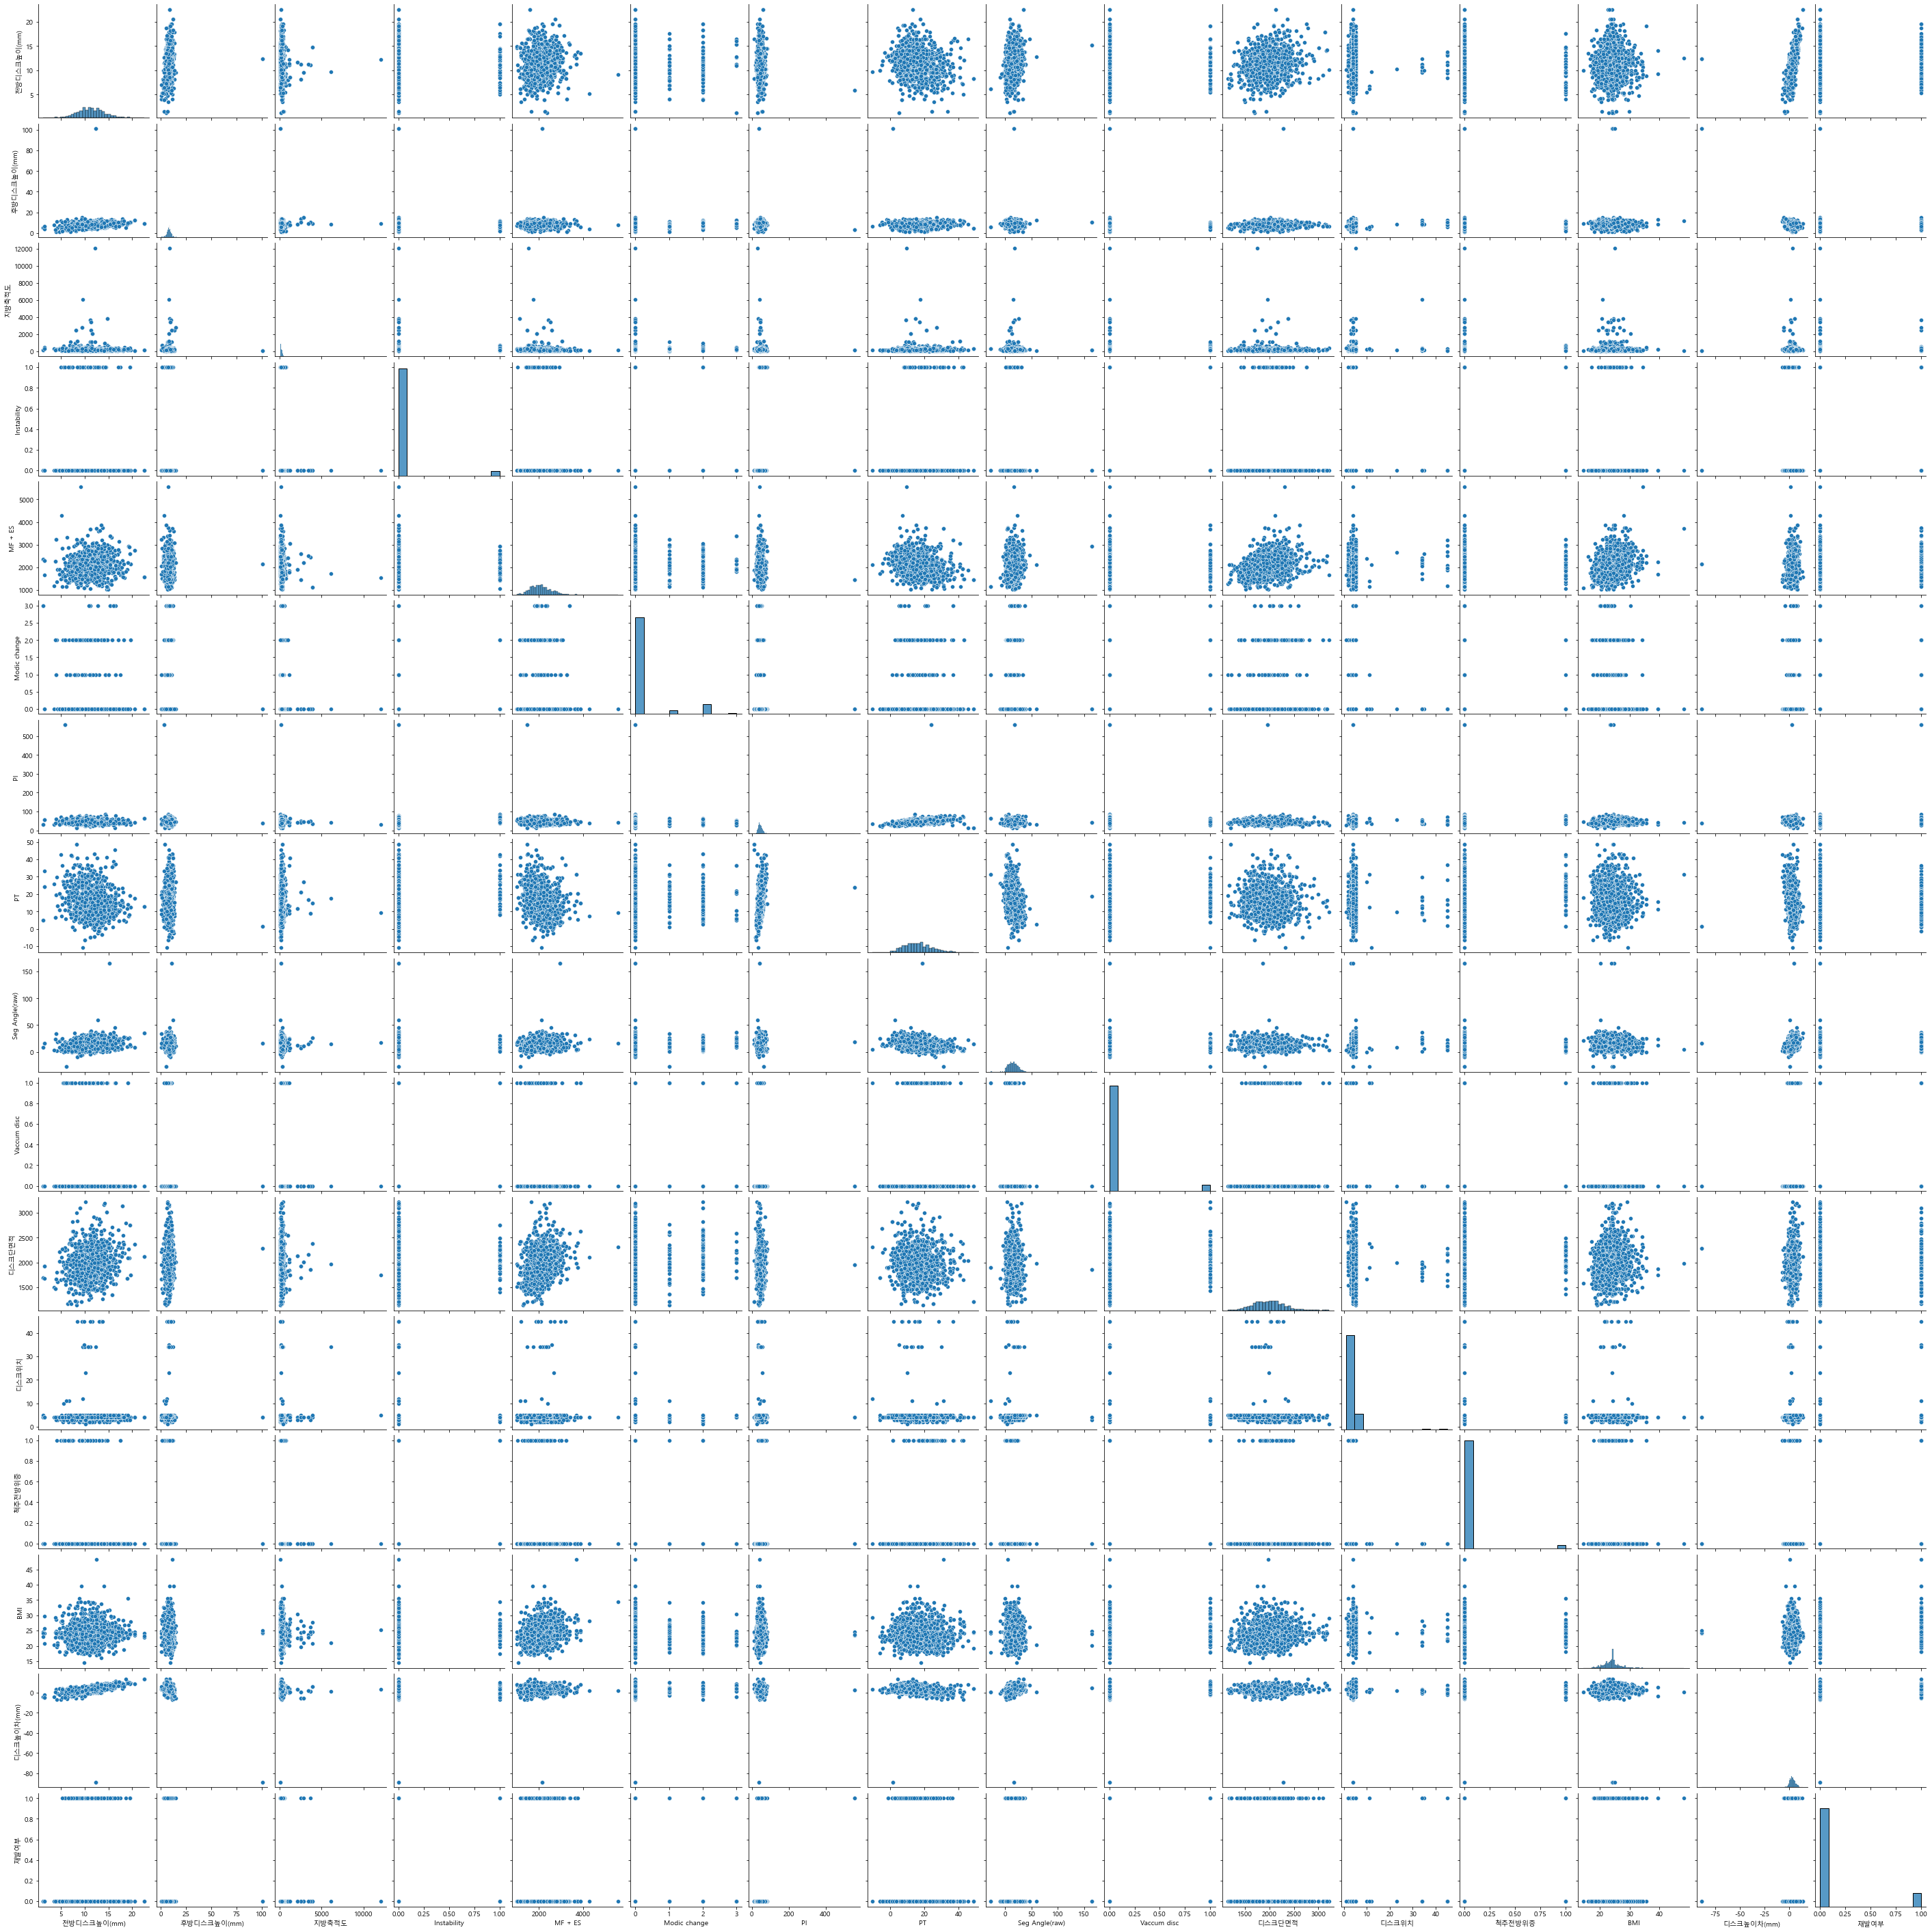

In [142]:
sns.pairplot(df1)

<AxesSubplot:>

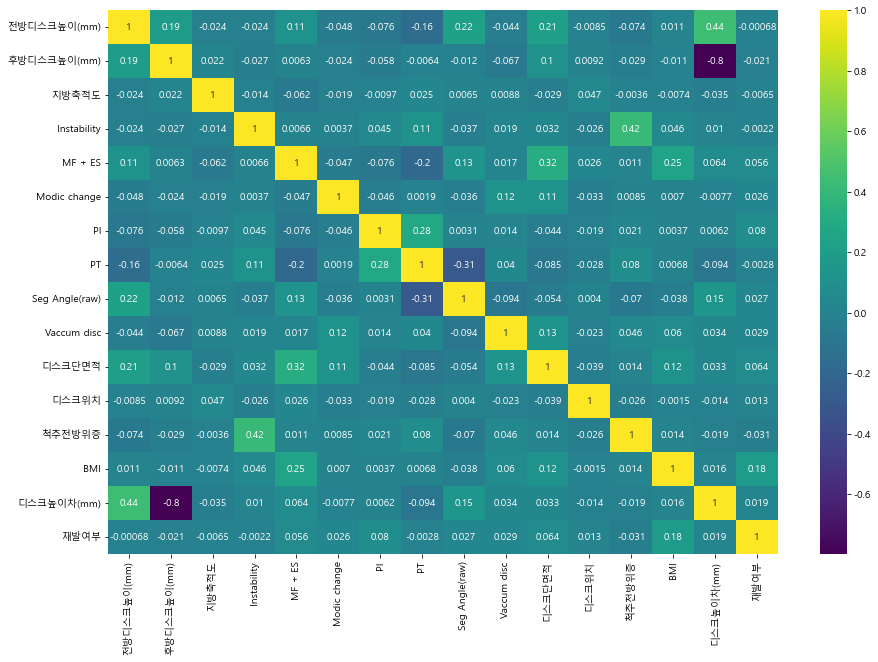

In [143]:
df_cor = df1.corr(method = 'pearson')
plt.figure(figsize = (15, 10))
sns.heatmap(df_cor, annot = True, cmap = 'viridis')